## Load datasets in dataframe

In [1]:
import pandas as pd
import codecs
import nltk 
from nltk.tokenize import word_tokenize
import numpy as np


In [2]:
data = pd.read_csv("C:/Users/jw156/Ironhack/Final_Project/NHS_headlines/scrape/daily_mail_final_df.csv")
data = data.drop(['Unnamed: 0'], axis=1)

In [3]:
data

,date,headline,weblink
0,18 January 2020,Doctors fear immunotherapy could actually make...,https://www.dailymail.co.uk/health/article-790...
1,6 April 2020,James Arthur jokes he's 'so happy hats were in...,https://www.dailymail.co.uk/tvshowbiz/article-...
2,15 April 2020,The Duke of Westminster gives £12.5m to the NH...,https://www.dailymail.co.uk/news/article-82208...
3,25 July 2020,Covid crisis is 'destroying women's careers' a...,https://www.dailymail.co.uk/news/article-85586...
4,16 December 2019,"Student, 21, battles sepsis after she caught a...",https://www.dailymail.co.uk/health/article-779...
...,...,...,...
3246,9 December 2019,Thrifty father-of-three reveals how he saves £...,https://www.dailymail.co.uk/femail/article-773...
3247,20 December 2019,The Cure viewers brand the show a 'heartbreaki...,https://www.dailymail.co.uk/femail/article-781...
3248,26 March 2020,SARAH VINE: When we look back on these extraor...,https://www.dailymail.co.uk/debate/article-815...
3249,25 September 2019,Men who struggle to become fathers are up to 6...,https://www.dailymail.co.uk/health/article-750...


# Removal Punctuation 

In [4]:
import string
import re

In [5]:
data['headline'] = data.headline.apply(lambda x: re.sub(r'[^\w\s]', '',x))

In [6]:
data

,date,headline,weblink
0,18 January 2020,Doctors fear immunotherapy could actually make...,https://www.dailymail.co.uk/health/article-790...
1,6 April 2020,James Arthur jokes hes so happy hats were inve...,https://www.dailymail.co.uk/tvshowbiz/article-...
2,15 April 2020,The Duke of Westminster gives 125m to the NHS ...,https://www.dailymail.co.uk/news/article-82208...
3,25 July 2020,Covid crisis is destroying womens careers acco...,https://www.dailymail.co.uk/news/article-85586...
4,16 December 2019,Student 21 battles sepsis after she caught an ...,https://www.dailymail.co.uk/health/article-779...
...,...,...,...
3246,9 December 2019,Thrifty fatherofthree reveals how he saves 200...,https://www.dailymail.co.uk/femail/article-773...
3247,20 December 2019,The Cure viewers brand the show a heartbreakin...,https://www.dailymail.co.uk/femail/article-781...
3248,26 March 2020,SARAH VINE When we look back on these extraord...,https://www.dailymail.co.uk/debate/article-815...
3249,25 September 2019,Men who struggle to become fathers are up to 6...,https://www.dailymail.co.uk/health/article-750...


# Cleaning vocab

In [7]:
# make all lowercase

In [8]:
data['headline'] = data['headline'].str.lower()

In [9]:
# change all AE to ER

In [10]:
data['headline'] = data['headline'].str.replace('ae', 'er')

In [11]:
# change all NHS to 'national health service'

In [12]:
data['headline'] = data['headline'].str.replace('nhs', 'national health service')
# cleaned_headlines = [w.replace('nhs', 'national health service') for w in er_headlines]

In [13]:
data

,date,headline,weblink
0,18 January 2020,doctors fear immunotherapy could actually make...,https://www.dailymail.co.uk/health/article-790...
1,6 April 2020,james arthur jokes hes so happy hats were inve...,https://www.dailymail.co.uk/tvshowbiz/article-...
2,15 April 2020,the duke of westminster gives 125m to the nati...,https://www.dailymail.co.uk/news/article-82208...
3,25 July 2020,covid crisis is destroying womens careers acco...,https://www.dailymail.co.uk/news/article-85586...
4,16 December 2019,student 21 battles sepsis after she caught an ...,https://www.dailymail.co.uk/health/article-779...
...,...,...,...
3246,9 December 2019,thrifty fatherofthree reveals how he saves 200...,https://www.dailymail.co.uk/femail/article-773...
3247,20 December 2019,the cure viewers brand the show a heartbreakin...,https://www.dailymail.co.uk/femail/article-781...
3248,26 March 2020,sarah vine when we look back on these extraord...,https://www.dailymail.co.uk/debate/article-815...
3249,25 September 2019,men who struggle to become fathers are up to 6...,https://www.dailymail.co.uk/health/article-750...


# Convert Numbers to Words

In [14]:
# Use regex to split int from str

In [15]:
import re

In [16]:
def split_num_from_str(x):
    pattern = r'(-?[0-9]+\.?[0-9]*)'
    for word in x:
        f = ' '.join(segment for segment in re.split(pattern, x) if segment)
    return f

In [17]:
data

,date,headline,weblink
0,18 January 2020,doctors fear immunotherapy could actually make...,https://www.dailymail.co.uk/health/article-790...
1,6 April 2020,james arthur jokes hes so happy hats were inve...,https://www.dailymail.co.uk/tvshowbiz/article-...
2,15 April 2020,the duke of westminster gives 125m to the nati...,https://www.dailymail.co.uk/news/article-82208...
3,25 July 2020,covid crisis is destroying womens careers acco...,https://www.dailymail.co.uk/news/article-85586...
4,16 December 2019,student 21 battles sepsis after she caught an ...,https://www.dailymail.co.uk/health/article-779...
...,...,...,...
3246,9 December 2019,thrifty fatherofthree reveals how he saves 200...,https://www.dailymail.co.uk/femail/article-773...
3247,20 December 2019,the cure viewers brand the show a heartbreakin...,https://www.dailymail.co.uk/femail/article-781...
3248,26 March 2020,sarah vine when we look back on these extraord...,https://www.dailymail.co.uk/debate/article-815...
3249,25 September 2019,men who struggle to become fathers are up to 6...,https://www.dailymail.co.uk/health/article-750...


In [18]:
data['headline'] = data.headline.apply(split_num_from_str)


In [19]:
data

,date,headline,weblink
0,18 January 2020,doctors fear immunotherapy could actually make...,https://www.dailymail.co.uk/health/article-790...
1,6 April 2020,james arthur jokes hes so happy hats were inve...,https://www.dailymail.co.uk/tvshowbiz/article-...
2,15 April 2020,the duke of westminster gives 125 m to the na...,https://www.dailymail.co.uk/news/article-82208...
3,25 July 2020,covid crisis is destroying womens careers acco...,https://www.dailymail.co.uk/news/article-85586...
4,16 December 2019,student 21 battles sepsis after she caught a...,https://www.dailymail.co.uk/health/article-779...
...,...,...,...
3246,9 December 2019,thrifty fatherofthree reveals how he saves 20...,https://www.dailymail.co.uk/femail/article-773...
3247,20 December 2019,the cure viewers brand the show a heartbreakin...,https://www.dailymail.co.uk/femail/article-781...
3248,26 March 2020,sarah vine when we look back on these extraord...,https://www.dailymail.co.uk/debate/article-815...
3249,25 September 2019,men who struggle to become fathers are up to ...,https://www.dailymail.co.uk/health/article-750...


In [20]:
# Remove all £$Euro signs

In [21]:
data['headline'] = data['headline'].str.replace('£', '')
data['headline'] = data['headline'].str.replace('€', '')
data['headline'] = data['headline'].str.replace('$', '')
data['headline'] = data['headline'].str.replace('ayear', 'a year')
data['headline'] = data['headline'].str.replace('yearold', 'year old')


In [22]:
# numbers converted to words

In [23]:
from num2words import num2words 

In [24]:
def convert_num_to_words(headline):
    headline = ' '.join([num2words(i) if i.isdigit() else i for i in headline.split()])
    return headline

In [25]:
data['headline'] = data['headline'].apply(convert_num_to_words)

In [216]:
data.head(100)

,date,headline,weblink,overall_sentiment,week,year,week_year,month_year,median_week_year_rating,median_month_year_rating,mode_week_year_rating,mode_month_year_rating,mean
date,,,,,,,,,,,,,
2019-09-22,2019-09-22,coroner links deaths of five women who suffere...,https://www.dailymail.co.uk/news/article-74915...,-0.7269,38,2019,2019-38,2019-9,-0.72690,-0.4215,-0.726900,-0.254644,-0.726900
2019-09-23,2019-09-23,the youngest children in a school year are thi...,https://www.dailymail.co.uk/health/article-749...,-0.4404,39,2019,2019-39,2019-9,-0.39185,-0.4215,-0.233645,-0.254644,-0.583650
2019-09-23,2019-09-23,read articles that feature this panel,https://www.dailymail.co.uk/health/fb-7494911/...,0.0000,39,2019,2019-39,2019-9,-0.39185,-0.4215,-0.233645,-0.254644,-0.389100
2019-09-23,2019-09-23,the safer painkillers experts fear are as risk...,https://www.dailymail.co.uk/health/article-749...,-0.7469,39,2019,2019-39,2019-9,-0.39185,-0.4215,-0.233645,-0.254644,-0.478550
2019-09-23,2019-09-23,you can eat pizza and still be low carb dr dav...,https://www.dailymail.co.uk/femail/food/articl...,-0.2500,39,2019,2019-39,2019-9,-0.39185,-0.4215,-0.233645,-0.254644,-0.432840
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-01,2019-10-01,doctor twenty-seven who has spent more than ha...,https://www.dailymail.co.uk/news/article-75258...,-0.0516,40,2019,2019-40,2019-10,-0.38180,-0.3211,-0.268249,-0.250177,-0.262940
2019-10-01,2019-10-01,according to the national health service we sh...,https://www.dailymail.co.uk/health/article-750...,0.2960,40,2019,2019-40,2019-10,-0.38180,-0.3211,-0.268249,-0.250177,-0.257177
2019-10-01,2019-10-01,breastfed babies may face more than double the...,https://www.dailymail.co.uk/health/article-752...,-0.4588,40,2019,2019-40,2019-10,-0.38180,-0.3211,-0.268249,-0.250177,-0.259235


# Inverse Document Frequency (IDF)


In [27]:








def sentiment_anal(hedline):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer 
    sia = SentimentIntensityAnalyzer()
    sentiment = (sia.polarity_scores(hedline)['compound'])
    return sentiment 

In [28]:
data['overall_sentiment'] = data['headline'].apply(sentiment_anal)

In [192]:
data.describe()

,overall_sentiment,week,year,median_week_year_rating,median_month_year_rating,mode_week_year_rating,mode_month_year_rating,mean
count,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000
mean,-0.161744,24.753866,2019.747745,-0.207788,-0.197446,-0.161744,-0.161744,-0.204360
std,0.523593,14.630148,0.434377,0.156035,0.128518,0.109928,0.080887,0.036769
min,-0.972600,1.000000,2019.000000,-0.844200,-0.421500,-0.844200,-0.307083,-0.726900
25%,-0.636900,13.000000,2019.000000,-0.328600,-0.318200,-0.236987,-0.250177,-0.233229
50%,-0.226300,23.000000,2020.000000,-0.227800,-0.238150,-0.190361,-0.144409,-0.212737
75%,0.253700,34.000000,2020.000000,-0.025800,-0.102700,-0.065430,-0.117437,-0.166668
max,0.960100,52.000000,2020.000000,0.077200,0.000000,0.071606,-0.019065,-0.157996


# Datetime Object

In [30]:
from datetime import datetime

In [31]:
data = data[data['date'] != 'No date given']

In [32]:
def date_times(x):
    new_date = x[1:-1]
    date = datetime.strptime(new_date, "%d %B %Y").date()        
    return date

def week_num(x):
    week = x.isocalendar()[1]
    return week

def year(x):
    year = x.year
    return year

def week_year(x):
    week = x.isocalendar()[1]
    year = x.year
    unique_key = str(year) + str("-") + str(week)
    return unique_key

def month_year(x):
    month = x.month
    year = x.year
    unique_key = str(year) + str("-") + str(month)
    return unique_key

In [33]:
data['date'] = data['date'].apply(date_times)

<ipython-input-33-c9fdb8294289>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = data['date'].apply(date_times)


In [34]:
data["week"]=data["date"].apply(week_num)

<ipython-input-34-a2817e611fe7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["week"]=data["date"].apply(week_num)


In [35]:
data["year"]=data["date"].apply(year)

<ipython-input-35-4b9c8b6757ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["year"]=data["date"].apply(year)


In [36]:
data["week_year"]=data["date"].apply(week_year)

<ipython-input-36-a968cab8ebbd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["week_year"]=data["date"].apply(week_year)


In [37]:
data["month_year"]=data["date"].apply(month_year)

<ipython-input-37-25c6a2524de6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["month_year"]=data["date"].apply(month_year)


In [38]:
data['median_week_year_rating'] = data.groupby('week_year', observed=True)['overall_sentiment'].transform('median')
data['median_month_year_rating'] = data.groupby('month_year', observed=True)['overall_sentiment'].transform('median')
data['mode_week_year_rating'] = data.groupby('week_year', observed=True)['overall_sentiment'].transform('mean')
data['mode_month_year_rating'] = data.groupby('month_year', observed=True)['overall_sentiment'].transform('mean')

<ipython-input-38-332fd8fffc5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['median_week_year_rating'] = data.groupby('week_year', observed=True)['overall_sentiment'].transform('median')
<ipython-input-38-332fd8fffc5a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['median_month_year_rating'] = data.groupby('month_year', observed=True)['overall_sentiment'].transform('median')
<ipython-input-38-332fd8fffc5a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [94]:
data

,date,headline,weblink,overall_sentiment,week,year,week_year,month_year,median_week_year_rating,median_month_year_rating,mode_week_year_rating,mode_month_year_rating,mean
date,,,,,,,,,,,,,
2019-09-22,2019-09-22,coroner links deaths of five women who suffere...,https://www.dailymail.co.uk/news/article-74915...,-0.7269,38,2019,2019-38,2019-9,-0.72690,-0.4215,-0.726900,-0.254644,-0.726900
2019-09-23,2019-09-23,the youngest children in a school year are thi...,https://www.dailymail.co.uk/health/article-749...,-0.4404,39,2019,2019-39,2019-9,-0.39185,-0.4215,-0.233645,-0.254644,-0.583650
2019-09-23,2019-09-23,read articles that feature this panel,https://www.dailymail.co.uk/health/fb-7494911/...,0.0000,39,2019,2019-39,2019-9,-0.39185,-0.4215,-0.233645,-0.254644,-0.389100
2019-09-23,2019-09-23,the safer painkillers experts fear are as risk...,https://www.dailymail.co.uk/health/article-749...,-0.7469,39,2019,2019-39,2019-9,-0.39185,-0.4215,-0.233645,-0.254644,-0.478550
2019-09-23,2019-09-23,you can eat pizza and still be low carb dr dav...,https://www.dailymail.co.uk/femail/food/articl...,-0.2500,39,2019,2019-39,2019-9,-0.39185,-0.4215,-0.233645,-0.254644,-0.432840
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-23,2020-08-23,police hunt cyclist who leaned into window of ...,https://www.dailymail.co.uk/news/article-86555...,0.0000,34,2020,2020-34,2020-8,-0.33990,-0.2500,-0.235494,-0.190836,-0.161460
2020-08-23,2020-08-23,is the skinny jab too good to be true,https://www.dailymail.co.uk/home/you/article-8...,0.6908,34,2020,2020-34,2020-8,-0.33990,-0.2500,-0.235494,-0.190836,-0.161186
2020-08-23,2020-08-23,hospital accused of baby deaths coverup grievi...,https://www.dailymail.co.uk/news/article-86565...,-0.8779,34,2020,2020-34,2020-8,-0.33990,-0.2500,-0.235494,-0.190836,-0.161417


In [99]:
data.date = data.date.apply(pd.to_datetime)


C:\Users\jw156\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


# Split data before and post

In [103]:
split_date = pd.datetime(2020,3,16)
pre_covid = data.loc[data["date"] < split_date]
post_covid = data.loc[data["date"] >= split_date]

<ipython-input-103-d238ee3831ad>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  split_date = pd.datetime(2020,3,16)


In [193]:
post_covid.describe()

,overall_sentiment,week,year,median_week_year_rating,median_month_year_rating,mode_week_year_rating,mode_month_year_rating,mean
count,1718.000000,1718.000000,1718.0,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000
mean,-0.095954,22.579162,2020.0,-0.117524,-0.117567,-0.095954,-0.107143,-0.179815
std,0.539875,6.735140,0.0,0.123928,0.105332,0.086513,0.054041,0.023656
min,-0.972600,12.000000,2020.0,-0.844200,-0.250000,-0.844200,-0.190836,-0.243641
25%,-0.571900,16.000000,2020.0,-0.226300,-0.238150,-0.164991,-0.144409,-0.187214
50%,-0.051600,23.000000,2020.0,-0.165500,-0.102700,-0.120640,-0.117437,-0.167573
75%,0.381800,29.000000,2020.0,0.000000,0.000000,-0.031774,-0.084235,-0.161633
max,0.960100,35.000000,2020.0,0.077200,0.000000,0.071606,-0.019065,-0.157996


In [194]:
pre_covid.describe()

,overall_sentiment,week,year,median_week_year_rating,median_month_year_rating,mode_week_year_rating,mode_month_year_rating,mean
count,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000
mean,-0.243293,27.449495,2019.435065,-0.319675,-0.296460,-0.243293,-0.229423,-0.234783
std,0.490772,20.252681,0.495944,0.113463,0.074329,0.075967,0.052499,0.025725
min,-0.971800,1.000000,2019.000000,-0.726900,-0.421500,-0.726900,-0.307083,-0.726900
25%,-0.670500,6.000000,2019.000000,-0.391850,-0.321100,-0.284877,-0.253650,-0.243917
50%,-0.318850,40.000000,2019.000000,-0.328600,-0.318200,-0.244346,-0.250177,-0.232830
75%,0.069450,46.000000,2020.000000,-0.272250,-0.202300,-0.216360,-0.159003,-0.221041
max,0.921700,52.000000,2020.000000,0.000000,-0.177900,-0.035060,-0.130225,-0.184005


In [104]:
pre_covid

,date,headline,weblink,overall_sentiment,week,year,week_year,month_year,median_week_year_rating,median_month_year_rating,mode_week_year_rating,mode_month_year_rating,mean
date,,,,,,,,,,,,,
2019-09-22,2019-09-22,coroner links deaths of five women who suffere...,https://www.dailymail.co.uk/news/article-74915...,-0.7269,38,2019,2019-38,2019-9,-0.72690,-0.4215,-0.726900,-0.254644,-0.726900
2019-09-23,2019-09-23,the youngest children in a school year are thi...,https://www.dailymail.co.uk/health/article-749...,-0.4404,39,2019,2019-39,2019-9,-0.39185,-0.4215,-0.233645,-0.254644,-0.583650
2019-09-23,2019-09-23,read articles that feature this panel,https://www.dailymail.co.uk/health/fb-7494911/...,0.0000,39,2019,2019-39,2019-9,-0.39185,-0.4215,-0.233645,-0.254644,-0.389100
2019-09-23,2019-09-23,the safer painkillers experts fear are as risk...,https://www.dailymail.co.uk/health/article-749...,-0.7469,39,2019,2019-39,2019-9,-0.39185,-0.4215,-0.233645,-0.254644,-0.478550
2019-09-23,2019-09-23,you can eat pizza and still be low carb dr dav...,https://www.dailymail.co.uk/femail/food/articl...,-0.2500,39,2019,2019-39,2019-9,-0.39185,-0.4215,-0.233645,-0.254644,-0.432840
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-14,2020-03-14,national health service says it will not test ...,https://www.dailymail.co.uk/news/article-81129...,-0.5574,11,2020,2020-11,2020-3,-0.30560,-0.2023,-0.296715,-0.130225,-0.244207
2020-03-14,2020-03-14,boris johnson tells private hospitals to free ...,https://www.dailymail.co.uk/news/article-81130...,0.7184,11,2020,2020-11,2020-3,-0.30560,-0.2023,-0.296715,-0.130225,-0.243511
2020-03-14,2020-03-14,cleaning staff walk out of first national heal...,https://www.dailymail.co.uk/news/article-81126...,0.0000,11,2020,2020-11,2020-3,-0.30560,-0.2023,-0.296715,-0.130225,-0.243335


In [105]:
post_covid

,date,headline,weblink,overall_sentiment,week,year,week_year,month_year,median_week_year_rating,median_month_year_rating,mode_week_year_rating,mode_month_year_rating,mean
date,,,,,,,,,,,,,
2020-03-16,2020-03-16,now the uk faces an oxygen crisis as boris joh...,https://www.dailymail.co.uk/news/article-81162...,-0.7269,12,2020,2020-12,2020-3,-0.2023,-0.2023,-0.146962,-0.130225,-0.243641
2020-03-16,2020-03-16,who should you ask for help if coronavirus sym...,https://www.dailymail.co.uk/health/article-811...,-0.1531,12,2020,2020-12,2020-3,-0.2023,-0.2023,-0.146962,-0.130225,-0.243576
2020-03-16,2020-03-16,pms wartime operation to prop up the national ...,https://www.dailymail.co.uk/news/article-81163...,0.0000,12,2020,2020-12,2020-3,-0.2023,-0.2023,-0.146962,-0.130225,-0.243401
2020-03-16,2020-03-16,hospitals treat record number of gamblers near...,https://www.dailymail.co.uk/news/article-81153...,0.4588,12,2020,2020-12,2020-3,-0.2023,-0.2023,-0.146962,-0.130225,-0.242896
2020-03-17,2020-03-17,will the national health service cope with cor...,https://www.dailymail.co.uk/health/article-811...,0.4939,12,2020,2020-12,2020-3,-0.2023,-0.2023,-0.146962,-0.130225,-0.242366
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-23,2020-08-23,police hunt cyclist who leaned into window of ...,https://www.dailymail.co.uk/news/article-86555...,0.0000,34,2020,2020-34,2020-8,-0.3399,-0.2500,-0.235494,-0.190836,-0.161460
2020-08-23,2020-08-23,is the skinny jab too good to be true,https://www.dailymail.co.uk/home/you/article-8...,0.6908,34,2020,2020-34,2020-8,-0.3399,-0.2500,-0.235494,-0.190836,-0.161186
2020-08-23,2020-08-23,hospital accused of baby deaths coverup grievi...,https://www.dailymail.co.uk/news/article-86565...,-0.8779,34,2020,2020-34,2020-8,-0.3399,-0.2500,-0.235494,-0.190836,-0.161417


In [109]:
# x = pre_covid.groupby['date'].agg({['overall_sentiment']:['mean']})

# EDA

In [110]:
# import seaborn as sns

In [111]:
# sns.lineplot(data=data, x='date', y='median_month_year_rating')

In [112]:
# sns.lineplot(data=data, x='date', y='mode_month_year_rating')

# Time Series

In [113]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from fbprophet import Prophet
%matplotlib inline
import matplotlib.pyplot as plt


## Pre-covid

## Creating input features(X) and target variable(y)


In [151]:
pre_covid.columns

Index(['date', 'headline', 'weblink', 'overall_sentiment', 'week', 'year',
       'week_year', 'month_year', 'median_week_year_rating',
       'median_month_year_rating', 'mode_week_year_rating',
       'mode_month_year_rating', 'mean'],
      dtype='object')

In [152]:
X= pre_covid[['mode_month_year_rating','date', 'headline', 'weblink', 'overall_sentiment', 'week', 'year',
       'week_year', 'month_year', 'median_week_year_rating',
       'median_month_year_rating', 'mode_week_year_rating']]
y= pre_covid.iloc[:,3]

#### Creating the data set for Prophet


In [153]:
train_dataset= pd.DataFrame()
train_dataset['ds'] = pd.to_datetime(X["date"])
train_dataset['y']=y
train_dataset.head(2)

,ds,y
date,,
2019-09-22,2019-09-22,-0.7269
2019-09-23,2019-09-23,-0.4404


#### Creating and fitting the Prophet model with default values


In [154]:
prophet_basic = Prophet()
prophet_basic.fit(train_dataset)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#### Predicting the values for the future

In [155]:
future = prophet_basic.make_future_dataframe(periods=26, freq='W')
forecast = prophet_basic.predict(future)
forecast.tail(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1410,2020-09-06,-0.373291,-0.927523,0.336352,-0.380761,-0.365434,0.073454,0.073454,0.073454,0.073454,0.073454,0.073454,0.0,0.0,0.0,-0.299838
1411,2020-09-13,-0.377080,-0.908761,0.360234,-0.385136,-0.368719,0.073454,0.073454,0.073454,0.073454,0.073454,0.073454,0.0,0.0,0.0,-0.303626


In [156]:
# future= prophet_basic.make_future_dataframe(periods=150)
# future.tail(2)

#### Plotting the predicted data


In [157]:
# forecast=prophet_basic.predict(future)

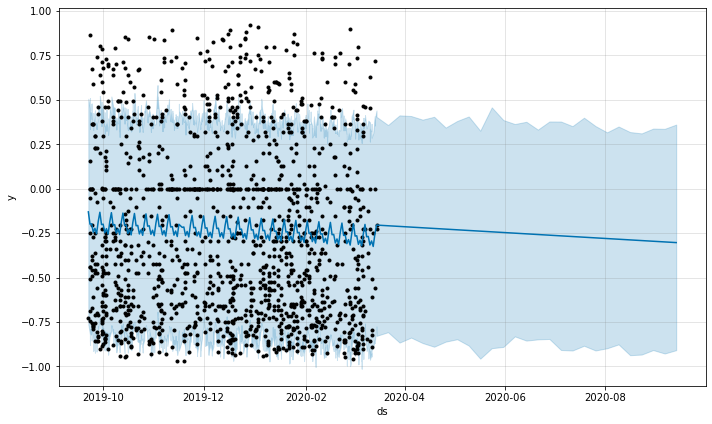

In [158]:
fig1 =prophet_basic.plot(forecast)

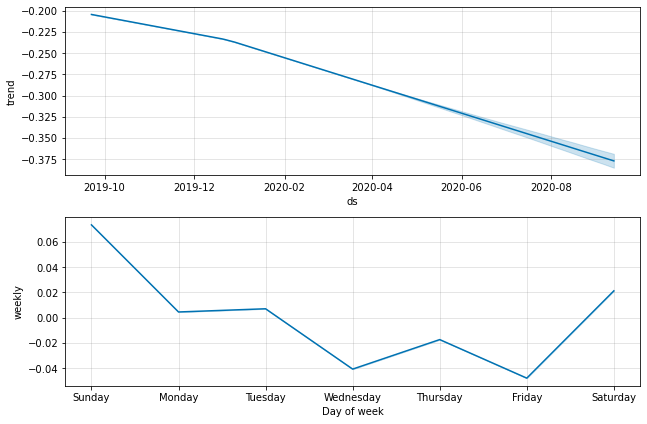

In [159]:
fig1 = prophet_basic.plot_components(forecast)


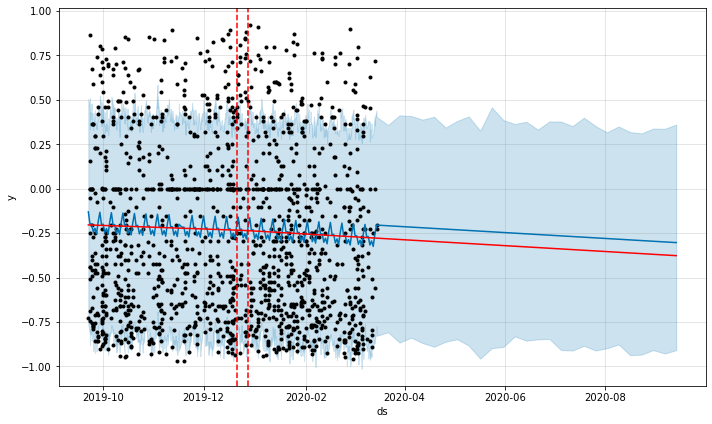

In [160]:
from fbprophet.plot import add_changepoints_to_plot
fig = prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet_basic, forecast)


In [161]:
prophet_basic.changepoints


44     2019-09-26
89     2019-10-01
133    2019-10-04
177    2019-10-10
221    2019-10-15
266    2019-10-19
310    2019-10-28
354    2019-11-04
399    2019-11-11
443    2019-11-19
487    2019-11-26
531    2019-12-03
576    2019-12-09
620    2019-12-16
664    2019-12-18
708    2019-12-21
753    2019-12-28
797    2020-01-03
841    2020-01-07
886    2020-01-12
930    2020-01-16
974    2020-01-21
1018   2020-01-24
1063   2020-01-29
1107   2020-02-02
Name: ds, dtype: datetime64[ns]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


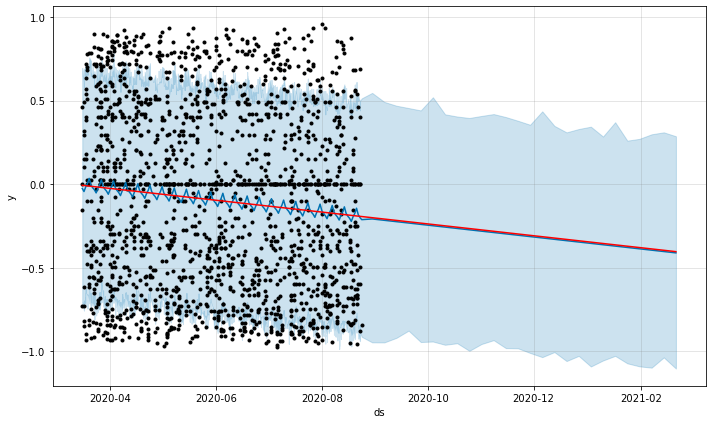

In [223]:
pro_change= Prophet(changepoint_range=0.9)
forecast = pro_change.fit(train_dataset).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

## With covid

## Creating input features(X) and target variable(y)


In [197]:
data.columns

Index(['date', 'headline', 'weblink', 'overall_sentiment', 'week', 'year',
       'week_year', 'month_year', 'median_week_year_rating',
       'median_month_year_rating', 'mode_week_year_rating',
       'mode_month_year_rating', 'mean'],
      dtype='object')

In [217]:
X= post_covid[['mode_month_year_rating','date', 'headline', 'weblink', 'overall_sentiment', 'week', 'year',
       'week_year', 'month_year', 'median_week_year_rating',
       'median_month_year_rating', 'mode_week_year_rating']]
y= post_covid.iloc[:,3]

#### Creating the data set for Prophet


In [218]:
train_dataset= pd.DataFrame()
train_dataset['ds'] = pd.to_datetime(X["date"])
train_dataset['y']=y
train_dataset.head(2)

,ds,y
date,,
2020-03-16,2020-03-16,-0.7269
2020-03-16,2020-03-16,-0.1531


#### Creating and fitting the Prophet model with default values


In [219]:
prophet_basic = Prophet()
prophet_basic.fit(train_dataset)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#### Predicting the values for the future

In [220]:
future = prophet_basic.make_future_dataframe(periods=26, freq='W')
forecast = prophet_basic.predict(future)
forecast.tail(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1742,2021-02-14,-0.377874,-1.082807,0.288073,-0.377875,-0.377873,-0.007921,-0.007921,-0.007921,-0.007921,-0.007921,-0.007921,0.0,0.0,0.0,-0.385795
1743,2021-02-21,-0.385528,-1.054232,0.298157,-0.385529,-0.385527,-0.007921,-0.007921,-0.007921,-0.007921,-0.007921,-0.007921,0.0,0.0,0.0,-0.393449


#### Plotting the predicted data


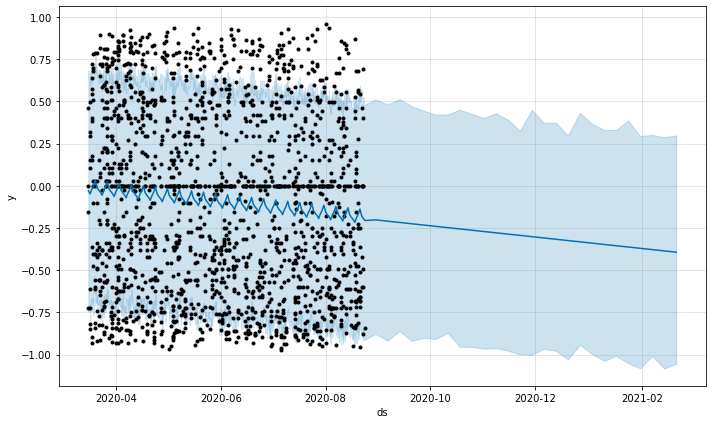

In [221]:
fig1 =prophet_basic.plot(forecast)

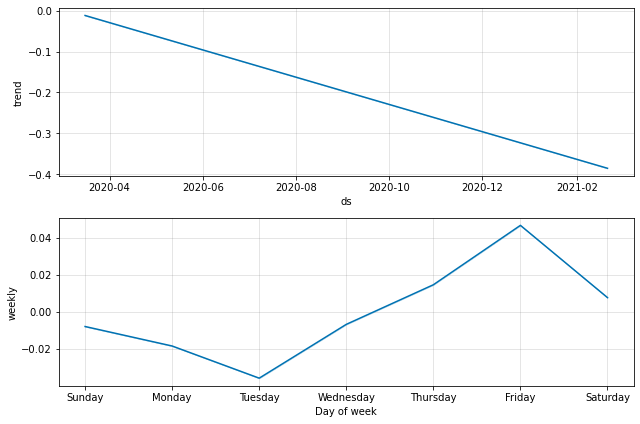

In [222]:
fig1 = prophet_basic.plot_components(forecast)


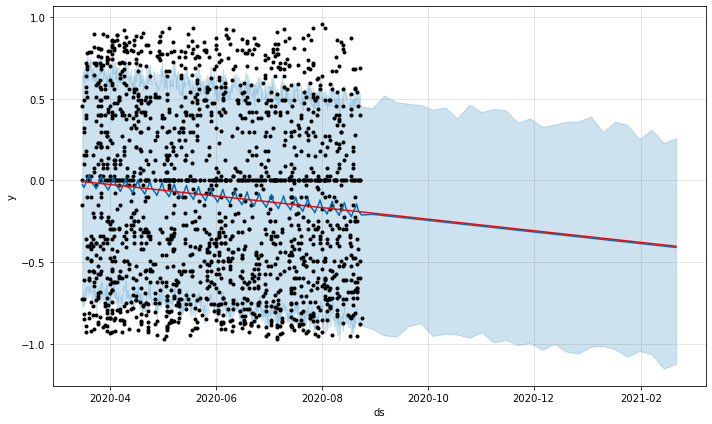

In [209]:
from fbprophet.plot import add_changepoints_to_plot
fig = prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet_basic, forecast)


In [190]:
prophet_basic.changepoints


55     2020-03-22
110    2020-03-26
165    2020-03-30
220    2020-04-02
275    2020-04-06
330    2020-04-10
384    2020-04-15
439    2020-04-19
494    2020-04-24
549    2020-05-01
604    2020-05-06
659    2020-05-11
714    2020-05-16
769    2020-05-21
824    2020-05-28
879    2020-06-02
934    2020-06-06
989    2020-06-12
1043   2020-06-18
1098   2020-06-23
1153   2020-06-30
1208   2020-07-05
1263   2020-07-09
1318   2020-07-15
1373   2020-07-20
Name: ds, dtype: datetime64[ns]

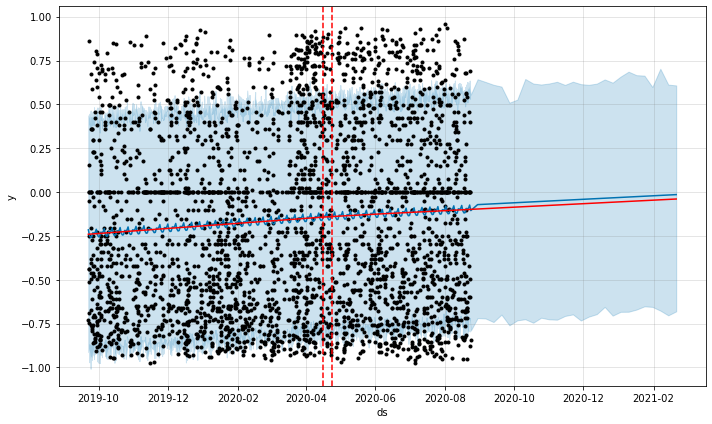

In [215]:
from fbprophet.plot import add_changepoints_to_plot
fig = prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet_basic, forecast)